In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
ON = False

In [4]:
FILE_PATH_s1="./../results/solar_s1_672_96_iTransformer_Solar_v2_M_ft672_sl96_ll96_pl512_dm8_nh2_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0/real_prediction.npy"

In [5]:
import pandas as pd
import os

def new_dataset(root_path, data_path, target='Total Energy(kWh)',
                new_predictions=None):
    # Load the previous dataset
    df_raw = pd.read_csv(os.path.join(root_path, data_path))
    date = 'date'
    if 'index' in df_raw.columns:
        date = 'index'
    # Ensure the 'date' column is in datetime format
    df_raw[date] = pd.to_datetime(df_raw[date])

    # Generate a new date range based on the existing dataset's last date
    last_date = df_raw[date].iloc[-1]
    l_new_predictions = 0
    if new_predictions is not None:
        l_new_predictions = len(new_predictions[0])
    new_dates = pd.date_range(start=last_date + pd.Timedelta(minutes=15), 
                               periods=l_new_predictions, 
                               freq='15min')


    # Create a new DataFrame for new predictions
    if new_predictions is not None:
        df_new = pd.DataFrame({
            date: new_dates,
        })
        
        new_cols = list(df_raw.columns)[1:]
        for i, col in enumerate(new_cols):
            pred = new_predictions[:, :, i][0]
            df_new[col] = np.where(pred < 0.00, 0, pred)

        # Combine the old and new datasets
        df_combined = pd.concat([df_raw, df_new], ignore_index=True)
    else:
        df_combined = df_raw
    # print(df_raw.shape, df_new.shape)
    new_data_path = data_path
    if '_v2' not in data_path:
        new_data_path = data_path.split('.')[0]+'_v2.csv'
    df_combined.to_csv(os.path.join(root_path, new_data_path), index=False)
    print('data saved ...')
    return df_combined

In [6]:
if ON:
    for i in range(1, 11):
        new_dataset('./../../../', f'data/input/site{i}/energy_consumption.csv')

In [7]:
if ON:
    for i in range(1, 11):
        new_dataset('./../../../', f'data/input/site{i}/solar_weather_data.csv')

In [8]:
df_init = pd.read_csv('./../../../data/input/site1/energy_consumption.csv')
df_v2 = pd.read_csv('./../../../data/input/site1/energy_consumption_v2.csv')
# assert df_init.shape == df_v2.shape
(df_init.shape[0] - df_v2.shape[0]) / 96

-7.0

In [13]:
df_init = pd.read_csv('./../../../data/input/site1/solar_weather_data.csv')
df_v2 = pd.read_csv('./../../../data/input/site1/solar_weather_data_v2.csv')
# assert df_init.shape == df_v2.shape
(df_init.shape[0] - df_v2.shape[0]) / 96

-7.0

In [15]:
df_init.tail(1)

,index,Solar Zenith Angle,Clearsky DHI,Clearsky DNI,Clearsky GHI,Relative Humidity,DHI,DNI,GHI,Energy Output(kWh)
5756,2020-02-29 23:00:00,161.05,0.0,0.0,0.0,75.31,0.0,0.0,0.0,0.0


<Axes: >

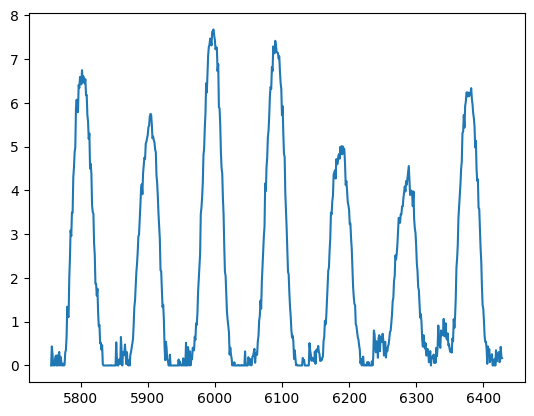

In [18]:
df_v2.tail(673)["Energy Output(kWh)"].plot()

In [11]:
if False:
    for i in range(1, 11):
        pred = pd.read_csv(f'./../../../data/input/site{i}/energy_consumption_v2.csv').tail(672)[['index', 'Total Energy(kWh)']]
        pred.to_csv(f'./../../../data/output/site{i}/pred_demand.csv', index=False)
        pred = pd.read_csv(f'./../../../data/input/site{i}/solar_weather_data_v2.csv').tail(672)[['index', 'Energy Output(kWh)']]
        pred.to_csv(f'./../../../data/output/site{i}/pred_solar.csv', index=False)